# Stock Market Analysis + Prediction using LSTM

In [ ]:
# Se instala la librería de yahoo finance
!pip install -q yfinance

In [3]:
# Se instala esta librería para leer los datos de acciones de yahoo
!pip install pandas_datareader

## 1. What was the change in price of the stock overtime?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['ORCL', 'GOOG', 'MSFT', 'TSLA']

# Set up End and Start times for data grab
tech_list = ['ORCL', 'GOOG', 'MSFT', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
company_list = [ORCL, GOOG, MSFT, TSLA]
company_name = ["ORACLE", "GOOGLE", "MICROSOFT", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-05-16,767.159973,769.760010,719.090027,724.369995,724.369995,28699500,TESLA
2022-05-17,747.359985,764.479980,728.849976,761.609985,761.609985,26745400,TESLA
2022-05-18,744.520020,760.500000,700.809998,709.809998,709.809998,29270600,TESLA
2022-05-19,707.000000,734.000000,694.109985,709.419983,709.419983,30098900,TESLA
2022-05-20,713.989990,721.580017,633.000000,663.900024,663.900024,48190600,TESLA
2022-05-23,655.020020,679.960022,638.059998,674.900024,674.900024,29634500,TESLA
2022-05-24,653.530029,653.919983,620.570007,628.159973,628.159973,29697500,TESLA
2022-05-25,623.849976,669.320007,623.010010,658.799988,658.799988,30713100,TESLA
2022-05-26,661.419983,718.669983,653.659973,707.729980,707.729980,35334400,TESLA


In [4]:
# Summary Stats
ORCL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,85.151746,86.101667,84.228453,85.122579,84.489338,9.840487e+06
std,7.654117,7.654180,7.650775,7.587299,7.377509,5.761350e+06
min,67.480003,67.900002,66.720001,67.040001,67.040001,3.620600e+06
25%,79.580002,80.465000,78.614998,79.584997,79.447308,6.572175e+06
50%,86.719997,87.930000,86.035000,86.950001,85.883076,8.205100e+06
75%,90.007500,90.745003,89.179998,89.822498,88.950996,1.105112e+07
max,104.290001,106.339996,102.279999,103.650002,102.863983,5.806900e+07


In [5]:
# General info
ORCL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-06-01 to 2022-05-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


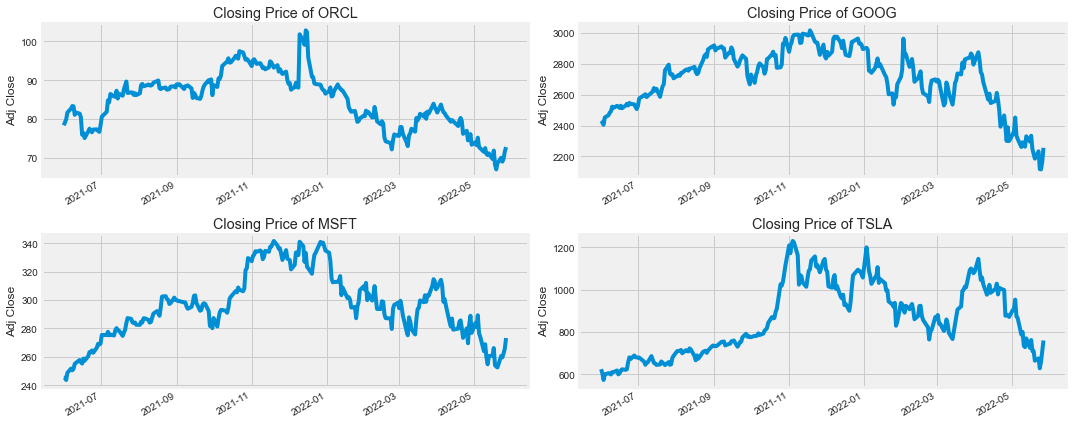

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

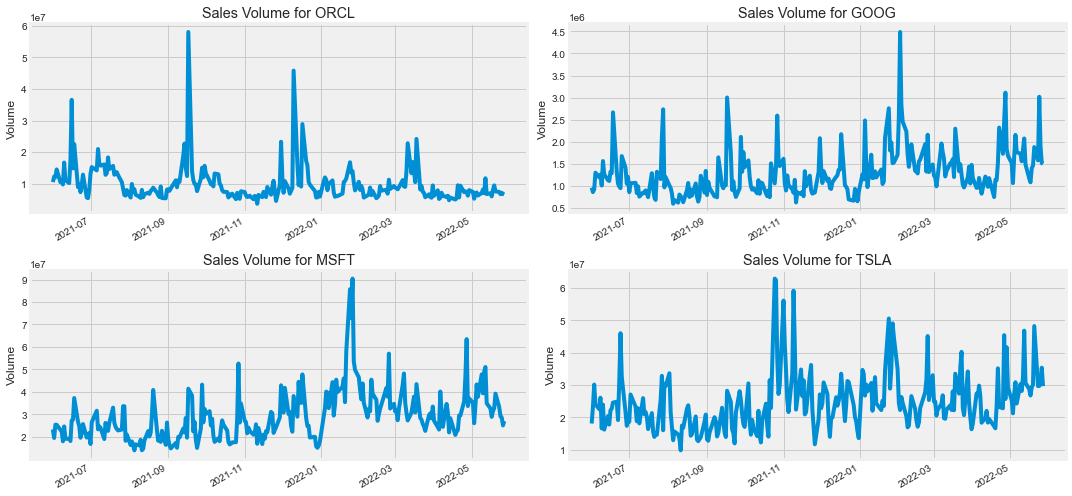

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2. What was the moving average of the various stocks?

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

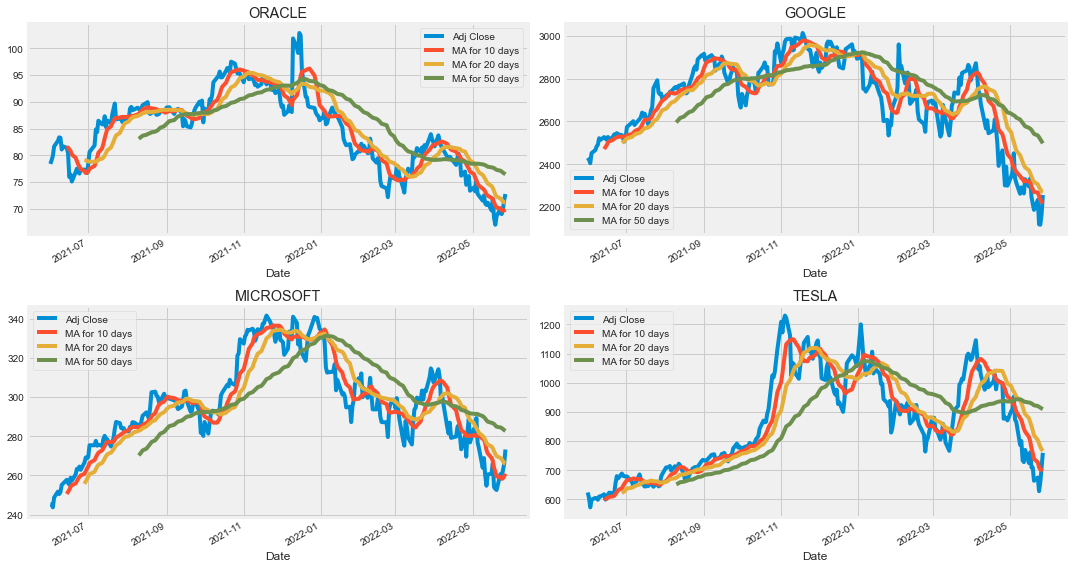

In [9]:
# Moving average
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

ORCL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ORACLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

## 3. What was the daily return of the stock on average?

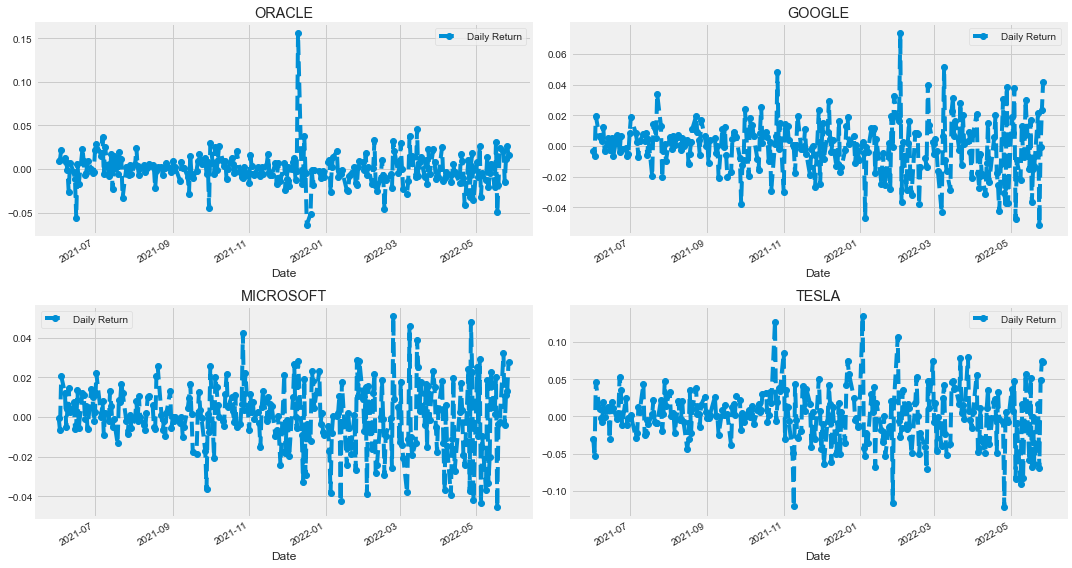

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

ORCL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ORACLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

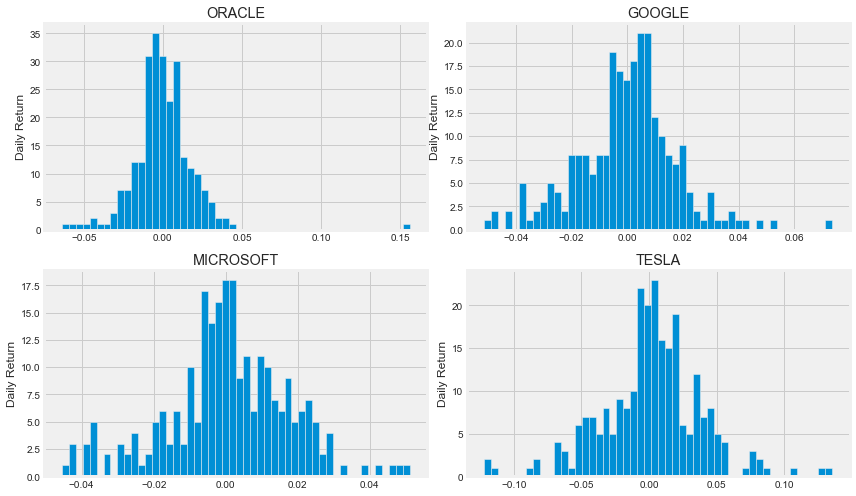

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,ORCL,GOOG,MSFT,TSLA
Date,,,,
2021-06-01,78.403625,2429.810059,245.396194,623.900024
2021-06-02,79.093361,2421.280029,245.297012,605.119995
2021-06-03,79.901344,2404.610107,243.719894,572.840027
2021-06-04,81.674965,2451.760010,248.758743,599.049988
2021-06-07,82.709572,2466.090088,251.754288,605.130005


In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,ORCL,GOOG,MSFT,TSLA
Date,,,,
2021-06-01,NaN,NaN,NaN,NaN
2021-06-02,0.008797,-0.003511,-0.000404,-0.030101
2021-06-03,0.010216,-0.006885,-0.006429,-0.053345
2021-06-04,0.022198,0.019608,0.020675,0.045754
2021-06-07,0.012667,0.005845,0.012042,0.010149


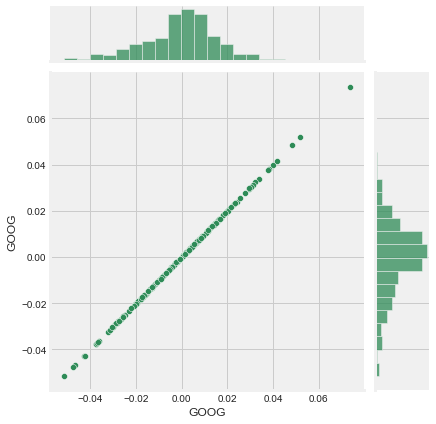

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

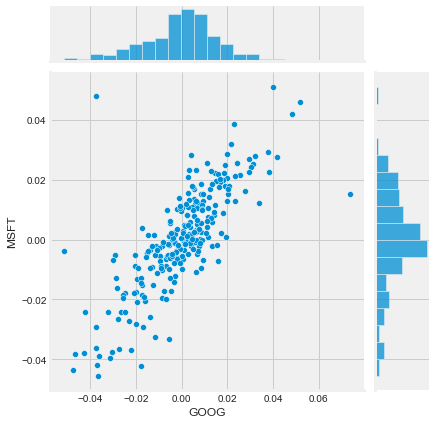

In [15]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

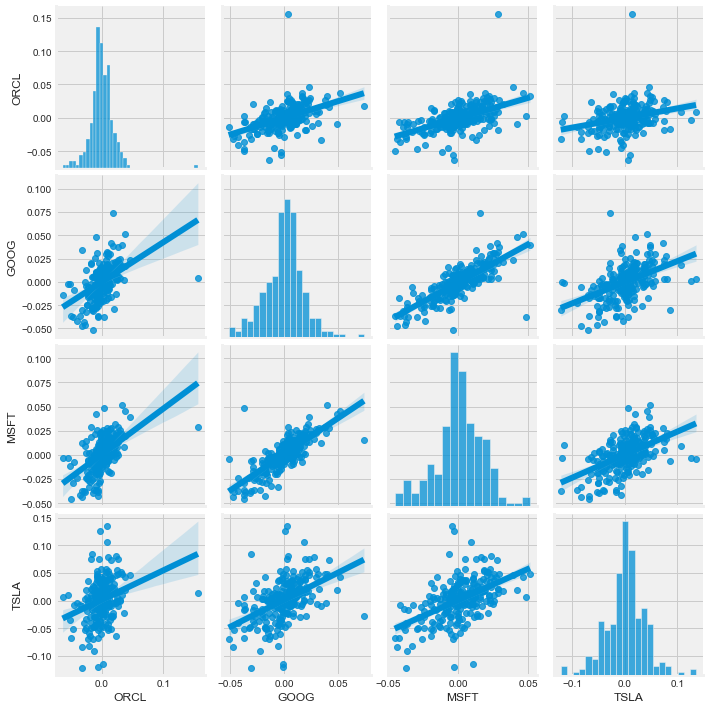

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg')

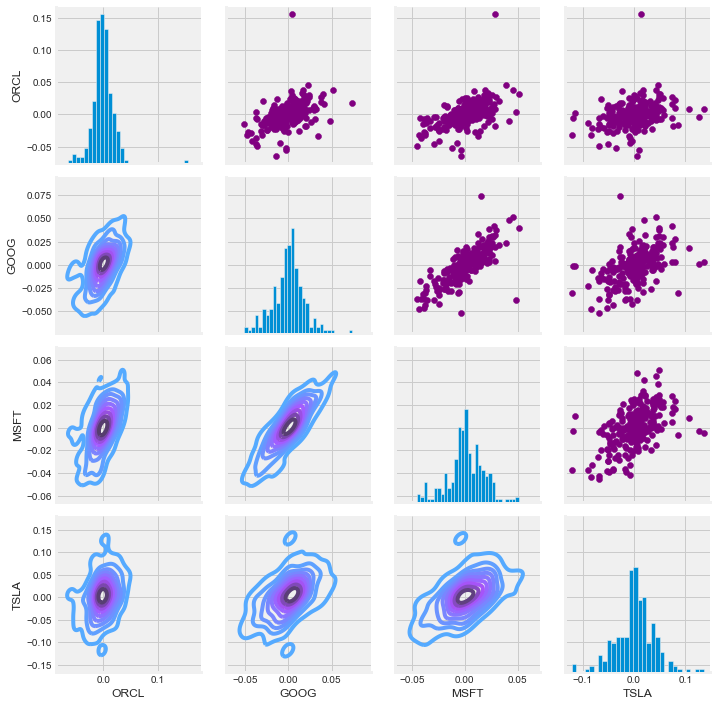

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

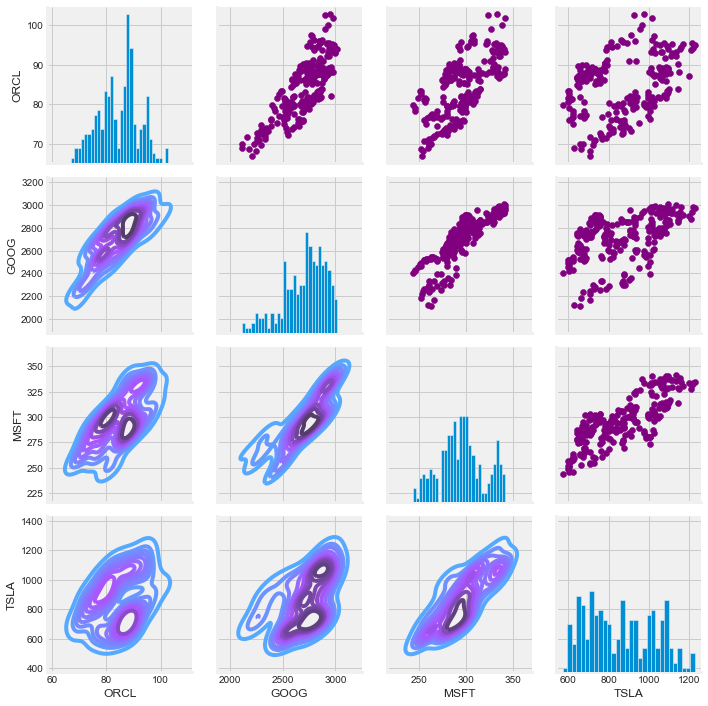

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

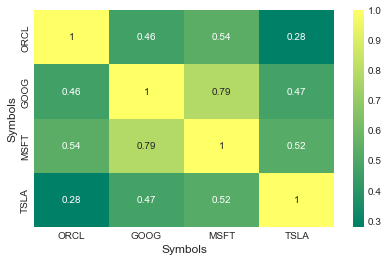

In [19]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

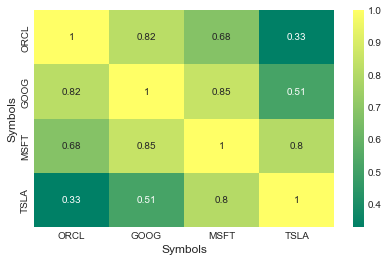

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## 5. How much value do we put at risk by investing in a particular stock?

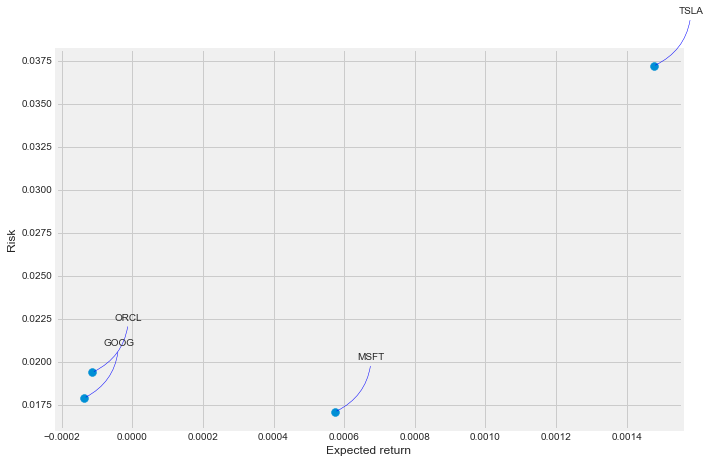

In [21]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6. Predicting the closing price stock price of Oracle:

In [22]:
# Get the stock quote
df = DataReader('ORCL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.660000,25.830000,26.330000,25.860001,37911800.0,22.216984
2012-01-04,26.230000,25.549999,25.950001,26.010000,45418500.0,22.345852
2012-01-05,26.900000,25.910000,26.010000,26.590000,50873400.0,22.844145
2012-01-06,27.150000,26.360001,26.670000,26.930000,55685000.0,23.136250
2012-01-09,27.120001,26.660000,26.900000,27.030001,38481100.0,23.274014
...,...,...,...,...,...,...
2022-05-23,70.470001,68.669998,69.309998,70.040001,7370200.0,70.040001
2022-05-24,70.529999,68.309998,69.669998,69.029999,6644100.0,69.029999
2022-05-25,70.220001,68.769997,68.879997,69.830002,7103300.0,69.830002


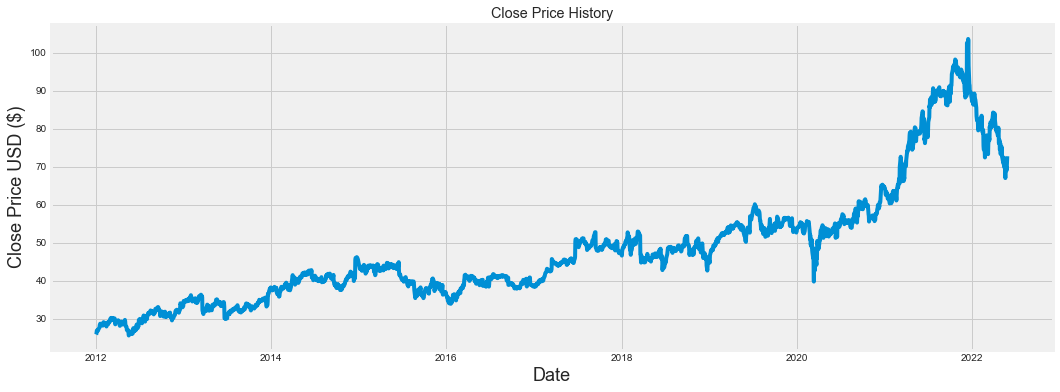

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2489

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00320349],
       [0.00512557],
       [0.01255766],
       ...,
       [0.56663251],
       [0.59008204],
       [0.60443359]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00320349, 0.00512557, 0.01255766, 0.0169144 , 0.0181958 ,
       0.01742694, 0.01640183, 0.01998974, 0.02216811, 0.02626857,
       0.03498205, 0.03780111, 0.0397232 , 0.03562274, 0.03716043,
       0.03716043, 0.03434137, 0.03600717, 0.03831368, 0.03331623,
       0.04190157, 0.0410046 , 0.04484879, 0.04343925, 0.04279857,
       0.03997948, 0.04202971, 0.03703228, 0.03613531, 0.03370066,
       0.03036903, 0.04279857, 0.04074834, 0.04010763, 0.03767297,
       0.0410046 , 0.04664274, 0.04677088, 0.04843668, 0.04664274,
       0.05407482, 0.05574063, 0.05932854, 0.05548437, 0.05907225,
       0.05715017, 0.057919  , 0.05253714, 0.057919  , 0.05420297,
       0.05702202, 0.05292157, 0.05317785, 0.05753459, 0.04869297,
       0.03869808, 0.03767297, 0.04548948, 0.04792414, 0.04805228])]
[0.04728342623551657]

[array([0.00320349, 0.00512557, 0.01255766, 0.0169144 , 0.0181958 ,
       0.01742694, 0.01640183, 0.01998974, 0.02216811, 0.02626857,
       0.03498205, 0.03780111, 0.03

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2429/2429 [==============================] - 44s 18ms/step - loss: 0.0011


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.846418427666557

C:\Users\ameri\AppData\Local\Temp/ipykernel_22856/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


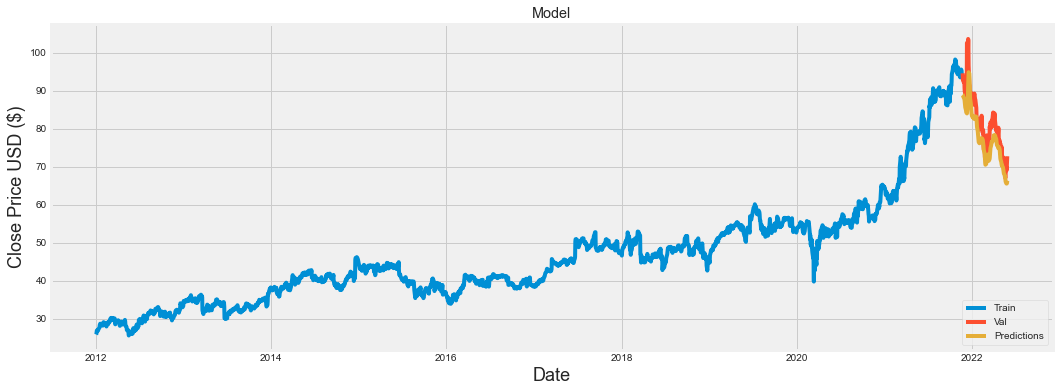

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-11-22,94.610001,88.980621
2021-11-23,92.940002,88.934196
2021-11-24,93.580002,88.593132
2021-11-26,92.330002,88.315193
2021-11-29,92.940002,87.886208
...,...,...
2022-05-23,70.040001,65.636719
2022-05-24,69.029999,65.591629
2022-05-25,69.830002,65.601494
